# Imports

In [1]:
from sat import *
from px import *
from run_px_experiments import parse_output

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#PROBLEM_FILE = './toy_sat_problems/toy_sat1.cnf'
#SOLUTIONS_FILE = './toy_sat_problems/toy_sat_1_solutions.txt'

#PROBLEM_FILE = './toy_sat_problems/toy_sat2.cnf'
#SOLUTIONS_FILE = './toy_sat_problems/toy_sat_2_solutions.txt'

#PROBLEM_FILE = './toy_sat_problems/toy_sat3.cnf'
#SOLUTIONS_FILE = './toy_sat_problems/toy_sat_3_solutions.txt'

PROBLEM_FILE = './toy_sat_problems/paper_example.cnf'
SOLUTIONS_FILE = './toy_sat_problems/paper_example_solutions.txt'

#PROBLEM_FILE = './sat_problems/trial_problems/rbcl_xits_08_UNSAT.cnf'
#SOLUTIONS_FILE = './results/ubcsat_outputs/rbcl_xits_08_UNSAT.txt'

In [2]:
def draw_graph(graph, node_size=400):
    nx.draw(graph, with_labels=True, node_color='white', node_size=node_size)
    ax = plt.gca() # to get the current axis
    ax.collections[0].set_edgecolor("#000000") 

# Load Problems / Solutions

In [36]:
%%time
sat = read_sat_problem(PROBLEM_FILE)

print('Clause #, Variables')
for i in range(len(sat.clauses)):
    print(i, sat.clauses[i])

print('\nVariable #, Clauses')
sat.create_var_to_clause_dict()
print(sat.var_to_clause_dict)

print('\nUnique Variables')
print(sat.unique_vars)

sat

Clause #, Variables
0 {2, -3, -1}
1 {2, -4, -3}
2 {3, -4, 5}
3 {-4, 5, 6}
4 {-7, 5, 6}
5 {-7, 6, 23}
6 {-8, 9, -10}
7 {-8, 9, 22}
8 {-8, -10, 23}
9 {11, -12, -13}
10 {-22, 11, -13}
11 {11, -20, 21}
12 {-22, 11, 21}
13 {24, -15, 14}
14 {16, 14, -17}
15 {16, -15, -17}
16 {16, 20, -17}
17 {18, 21, -19}

Variable #, Clauses
{2: [0, 1], 3: [0, 1, 2], 1: [0], 4: [1, 2, 3], 5: [2, 3, 4], 6: [3, 4, 5], 7: [4, 5], 23: [5, 8], 8: [6, 7, 8], 9: [6, 7], 10: [6, 8], 22: [7, 10, 12], 11: [9, 10, 11, 12], 12: [9], 13: [9, 10], 20: [11, 16], 21: [11, 12, 17], 24: [13], 15: [13, 15], 14: [13, 14], 16: [14, 15, 16], 17: [14, 15, 16], 18: [17], 19: [17]}

Unique Variables
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}
Wall time: 964 µs


SAT(n = 24, m = 18, k = 3, name = 'paper_example.cnf')

In [4]:
"""%%time
solutions = parse_output(SOLUTIONS_FILE)

print(solutions.shape)

p1 = solutions[16]
p2 = solutions[17]

p1_unsat = np.argwhere(~(sat.evaluate_solution(p1))).flatten()
p2_unsat = np.argwhere(~(sat.evaluate_solution(p2))).flatten()
print(f'P1 Unsat: {len(p1_unsat)}')
print(f'P2 Unsat: {len(p2_unsat)}')

print('')
print(f'P1 Score: {sat.score_solution(p1)}')
print(f'P2 Score: {sat.score_solution(p2)}')

assert(sat.m - sat.score_solution(p1) == len(p1_unsat))
assert(sat.m - sat.score_solution(p2) == len(p2_unsat))"""

"%%time\nsolutions = parse_output(SOLUTIONS_FILE)\n\nprint(solutions.shape)\n\np1 = solutions[16]\np2 = solutions[17]\n\np1_unsat = np.argwhere(~(sat.evaluate_solution(p1))).flatten()\np2_unsat = np.argwhere(~(sat.evaluate_solution(p2))).flatten()\nprint(f'P1 Unsat: {len(p1_unsat)}')\nprint(f'P2 Unsat: {len(p2_unsat)}')\n\nprint('')\nprint(f'P1 Score: {sat.score_solution(p1)}')\nprint(f'P2 Score: {sat.score_solution(p2)}')\n\nassert(sat.m - sat.score_solution(p1) == len(p1_unsat))\nassert(sat.m - sat.score_solution(p2) == len(p2_unsat))"

In [37]:
with open(SOLUTIONS_FILE) as solutions_file:
    solutions = [line.strip() for line in solutions_file.readlines()]
    
print(f'P1 Bitstring: {solutions[0]}')
print(f'P2 Bitstring: {solutions[1]}')
print('')

p1 = bitstring_to_int_array(solutions[0])
p2 = bitstring_to_int_array(solutions[1])
print(f'P1 Assignments: {p1}')
print(f'P2 Assignments: {p2}')
print('')

p1_unsat = np.argwhere(~(sat.evaluate_solution(p1))).flatten()
p2_unsat = np.argwhere(~(sat.evaluate_solution(p2))).flatten()
print(f'P1 Unsat Clauses: {p1_unsat}, {sat.clauses[p1_unsat]}')
print(f'P2 Unsat Clauses: {p2_unsat}, {sat.clauses[p2_unsat]}')
print('')

print(f'P1 Score: {sat.score_solution(p1)}')
print(f'P2 Score: {sat.score_solution(p2)}')

P1 Bitstring: 010000110010000011011111
P2 Bitstring: 101111001101111100111111

P1 Assignments: [-1, 2, -3, -4, -5, -6, 7, 8, -9, -10, 11, -12, -13, -14, -15, -16, 17, 18, -19, 20, 21, 22, 23, 24]
P2 Assignments: [1, -2, 3, 4, 5, 6, -7, -8, 9, 10, -11, 12, 13, 14, 15, 16, -17, -18, 19, 20, 21, 22, 23, 24]

P1 Unsat Clauses: [ 4 14], [{-7, 5, 6} {16, 14, -17}]
P2 Unsat Clauses: [ 0  1  9 10], [{2, -3, -1} {2, -4, -3} {11, -12, -13} {-22, 11, -13}]

P1 Score: 16
P2 Score: 14


# PX

24 42 1
Wall time: 33.9 ms


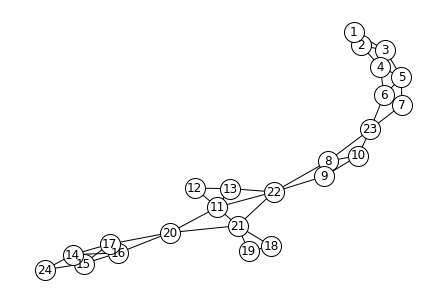

In [38]:
%%time
vig = get_vig(sat)

print(vig.number_of_nodes(), 
      vig.number_of_edges(), 
      nx.number_connected_components(vig))

draw_graph(vig)

19 24 5
Wall time: 29.9 ms


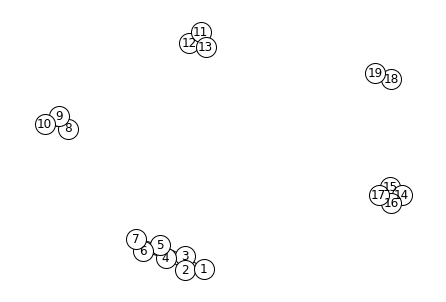

In [39]:
%%time
decomposed_vig = decompose_vig(vig, p1, p2)

print(decomposed_vig.number_of_nodes(), 
      decomposed_vig.number_of_edges(), 
      nx.number_connected_components(decomposed_vig))

draw_graph(decomposed_vig)

In [40]:
%%time
new_solution = partition_crossover(sat, decomposed_vig, p1, p2, none_fill='p1', verbose=2)

print('')
print(f'New Solution: {new_solution}')
print(f'New Solution Score: {sat.score_solution(new_solution)}')
print(f'Remaining Unsatisfied Clauses: {sat.clauses[~sat.evaluate_solution(new_solution)]}')

Common variable assignments: [None None None None None None None None None None None None None None
 None None None None None 20 21 22 23 24]
Component: {1, 2, 3, 4, 5, 6, 7}
	Sub problem clauses: [{2, -3, -1} {2, -4, -3} {3, -4, 5} {-4, 5, 6} {-7, 5, 6} {-7, 6, 23}]
	P1 Score: 5, P2 Score: 4
Component: {8, 9, 10}
	Sub problem clauses: [{-8, -10, 23} {-8, 9, -10} {-8, 9, 22}]
	P1 Score: 3, P2 Score: 3
Component: {11, 12, 13}
	Sub problem clauses: [{11, -12, -13} {-22, 11, -13} {11, -20, 21} {-22, 11, 21}]
	P1 Score: 4, P2 Score: 2
Component: {16, 17, 14, 15}
	Sub problem clauses: [{16, 20, -17} {24, -15, 14} {16, 14, -17} {16, -15, -17}]
	P1 Score: 3, P2 Score: 4
Component: {18, 19}
	Sub problem clauses: [{18, 21, -19}]
	P1 Score: 1, P2 Score: 1
Solution after recombination: [-1 2 -3 -4 -5 -6 7 8 -9 -10 11 -12 -13 14 15 16 -17 18 -19 20 21 22 23 24]
Filling in None spots with assignments from P1

New Solution: [-1 2 -3 -4 -5 -6 7 8 -9 -10 11 -12 -13 14 15 16 -17 18 -19 20 21 22 23 24]


In [122]:
s = ''
for bit in [0 if var < 0 else 1 for var in new_solution]:
    s += str(bit)
    
s

'010000110010011101011111'

# PX Prime on P1

In [41]:
%%time
decomposed_sat, iterations = decompose_problem(sat, p1, p2, p1_unsat, p2_unsat, init_method='p1', verbose=2)

print('')
print(decomposed_sat.clauses)
print(decomposed_sat.unique_vars)

decomposed_sat

[3,4] Length of Init SWAPC: 2
[3,4] Init SWAPC: {4, 14}
[5] Length of Init VAR: 6
[5] Init VAR: {5, 6, 7, 14, 16, 17}
[5] Length of No Common Variables VAR: 6
[5] No Common Variables VAR: {5, 6, 7, 14, 16, 17}
Length of sat_by_common: 8
sat_by_common: {5, 7, 8, 11, 12, 13, 16, 17}
[6] Length of SWAPC: 8
[6] SWAPC: {2, 3, 4, 5, 13, 14, 15, 16}
[7] Length of SWAPC: 5
[7] SWAPC: {2, 3, 4, 14, 15}
[8] Length of VAR: 9
[8] VAR: {3, 4, 5, 6, 7, 14, 15, 16, 17}
[6] Length of SWAPC: 10
[6] SWAPC: {0, 1, 2, 3, 4, 5, 13, 14, 15, 16}
[7] Length of SWAPC: 7
[7] SWAPC: {0, 1, 2, 3, 4, 14, 15}
[8] Length of VAR: 11
[8] VAR: {1, 2, 3, 4, 5, 6, 7, 14, 15, 16, 17}
[6] Length of SWAPC: 10
[6] SWAPC: {0, 1, 2, 3, 4, 5, 13, 14, 15, 16}
[7] Length of SWAPC: 7
[7] SWAPC: {0, 1, 2, 3, 4, 14, 15}
[8] Length of VAR: 11
[8] VAR: {1, 2, 3, 4, 5, 6, 7, 14, 15, 16, 17}
Loop ran 3 times

[{2, -3, -1} {2, -4, -3} {3, -4, 5} {-4, 5, 6} {-7, 5, 6} {16, 14, -17}
 {16, -15, -17}]
{1, 2, 3, 4, 5, 6, 7, 14, 15, 16, 17}
Wa

SAT(n = 11, m = 7, k = 3, name = 'decomposed_paper_example.cnf')

11 16 2
Wall time: 26.4 ms


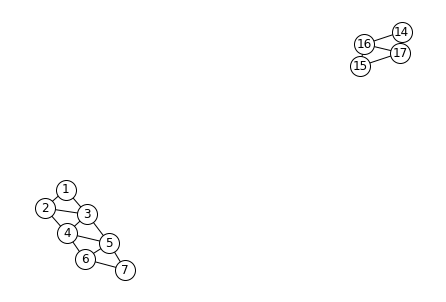

In [42]:
%%time
vig_prime = get_vig(decomposed_sat, verbose=False)

print(vig_prime.number_of_nodes(), 
      vig_prime.number_of_edges(), 
      nx.number_connected_components(vig_prime))

draw_graph(vig_prime)

11 16 2
Wall time: 27.9 ms


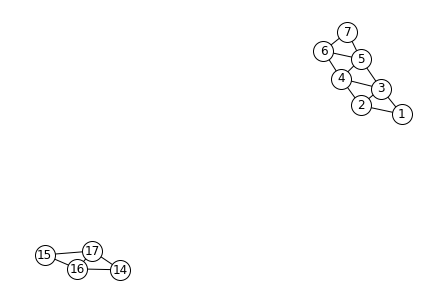

In [44]:
%%time
decomposed_vig_prime = decompose_vig(vig_prime, p1, p2)

print(decomposed_vig_prime.number_of_nodes(), 
      decomposed_vig_prime.number_of_edges(), 
      nx.number_connected_components(decomposed_vig_prime))

draw_graph(decomposed_vig_prime)

In [45]:
%%time
new_solution_prime = partition_crossover(decomposed_sat, decomposed_vig_prime, p1, p2, none_fill='p1', verbose=2)

print('')
print(f'New Solution: {new_solution_prime}')
print(f'New Solution Score: {sat.score_solution(new_solution_prime)}')
print(f'Remaining Unsatisfied Clauses: {sat.clauses[~sat.evaluate_solution(new_solution_prime)]}')

Common variable assignments: [None None None None None None None None None None None None None None
 None None None None None 20 21 22 23 24]
Component: {1, 2, 3, 4, 5, 6, 7}
	Sub problem clauses: [{2, -3, -1} {2, -4, -3} {3, -4, 5} {-4, 5, 6} {-7, 5, 6}]
	P1 Score: 4, P2 Score: 3
Component: {16, 17, 14, 15}
	Sub problem clauses: [{16, 14, -17} {16, -15, -17}]
	P1 Score: 1, P2 Score: 2
Solution after recombination: [-1 2 -3 -4 -5 -6 7 None None None None None None 14 15 16 -17 None None
 20 21 22 23 24]
Filling in None spots with assignments from P1

New Solution: [-1 2 -3 -4 -5 -6 7 8 -9 -10 11 -12 -13 14 15 16 -17 18 -19 20 21 22 23 24]
New Solution Score: 17
Remaining Unsatisfied Clauses: [{-7, 5, 6}]
Wall time: 997 µs


# Drawing Graphs

In [78]:
pos = {
    1: (163, 117),
    2: (160, 97),
    3: (143, 102),
    4: (156, 81),
    5: (138, 82),
    6: (153, 63),
    7: (132, 62),
    8: (114, 36),
    9: (103, 18),
    10: (133, 16),
    11: (47, 49),
    12: (30, 30),
    13: (58, 30),
    14: (40, 102),
    15: (18, 97),
    16: (24, 81),
    17: (46, 85),
    18: (86, 81),
    19: (106, 65),
    20: (38, 67),
    21: (83, 58),
    22: (81, 35),
    23: (142, 44),
    24: (27, 119),
}

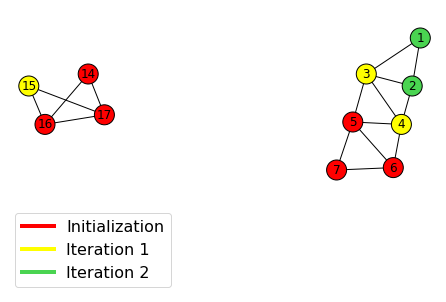

In [117]:
G = vig_prime

colors = []
for node in G.nodes():
    if node in [5,6,7,14,16,17]:
        colors.append('red')
    elif node in [3,4,15]:
        colors.append('yellow')
    else:
        colors.append('#4ad451')

nx.draw(G, with_labels=True, node_color=colors, node_size=400, pos=pos)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
ax.set_xlim([10, 170])
ax.set_ylim([10, 130])

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='yellow', lw=4),
                Line2D([0], [0], color='#4ad451', lw=4)]

ax.legend(custom_lines, ['Initialization', 'Iteration 1', 'Iteration 2'], loc='lower left', fontsize=16)